# Projet numérique

## Question 1

### Interprétation physique.

$x_1 = Population~de~proies\\x_2 = Population~de~prédateurs\\\alpha = Taux~de~reproduction~des~proies\\\beta x_2 = Taux~de~destruction~des~proies~en~fonction~du~nombre~de~prédateurs\\\beta = Taux~de~destruction~des~proies~par~prédateur\\\gamma = Taux~de~mortalité~naturelle~des~prédateurs\\\delta x_1 = Taux~de~reproduction~des~prédateurs~en~fonction~du~nombre~de~proies~disponibles\\\delta = Taux~de~reproduction~des~prédateurs~par~proie~disponible$

### Recherche des points d'équilibre.

On a: $f:\mathbb{R}_+\times\mathbb{R}_+\longrightarrow\mathbb{R}\times\mathbb{R}\\f(x = (x_1,x_2)) = (x_1(\alpha-\beta x_2), -x_2(\gamma-\delta x_1))$

$f(x_1,x_2) = (0,0)\iff \left\{ \begin{array}{ll} x_1(\alpha-\beta x_2) = 0~(1) \\ x_2(\gamma-\delta x_1) = 0~(2) \end{array} \right.$

$\delta(1)+\beta(2)\Rightarrow\alpha\delta x_1-\delta\beta x_1 x_2-\gamma\beta x_2+\delta\beta x_1 x_2 = 0\iff\alpha\delta x_1-\gamma\beta x_2 = 0 \Rightarrow\left\{ \begin{array}{ll} x_1=0~et~x_2=0 \\ x_1=\frac{\gamma}{\delta}~et~x_2=\frac{\alpha}{\beta} \end{array} \right.$

Il existe donc deux points d'équilibre:
$(0,0)~et~\overline{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

Calculons la Jacobienne de f:

$J_f(x_1,x_2)=\begin{pmatrix} \alpha-\beta x_2 & -\beta x_1 \\ \delta x_2 & \delta x_1-\gamma\end{pmatrix}$

$J_f(0,0) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma\end{pmatrix}=A\Rightarrow\left\{ \begin{array}{ll} tr(A) = \alpha-\gamma \\ det(A) = -\alpha\gamma<0\Rightarrow Point~instable. \end{array} \right.$

$J_f(\overline{x}) = \begin{pmatrix} 0 & -\frac{\beta\gamma}{\delta} \\ \frac{\delta\alpha}{\beta} & 0\end{pmatrix}=A\Rightarrow\left\{ \begin{array}{ll} tr(A) = 0 \\ det(A) = \alpha\gamma>0\end{array} \right.$

On ne peut donc pas conclure quant à la stabilité du point $\overline{x}$ ici car $tr(A)=0$. Le linéarisé ne suffit pas, il faudra avoir recours à la carctérisation de Lyapunov.

## Question 2

In [42]:
import autograd
import autograd.numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from IPython.display import display

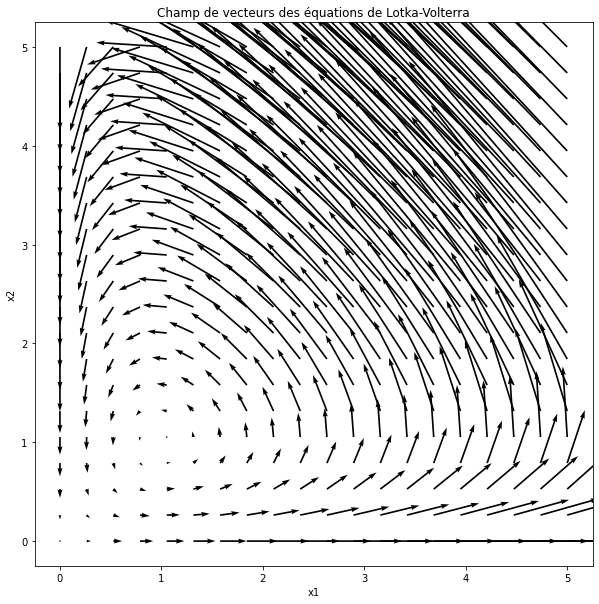

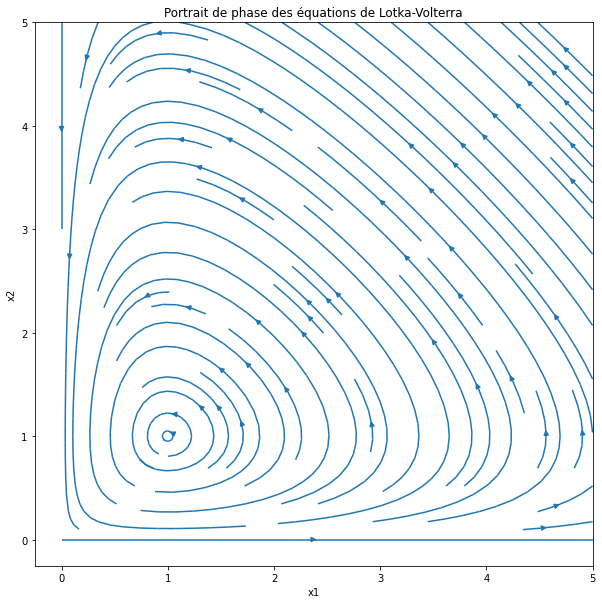

In [2]:
global alpha
alpha = 1.5
global beta
beta = 1.5
global delta
delta = 1.5
global gamma
gamma = 1.5


def f(x1 ,x2):
    return np.array([x1*(alpha-beta*x2), -x2*(gamma-delta*x1)])


# Champ de vecteurs
def champ(fct):
    x = np.linspace(0, 5, 20)
    y = np.linspace(0, 5, 20)
    X, Y = np.meshgrid(x, y)
    R = f(X, Y)
    plt.quiver(X, Y, R[0], R[1], scale = 50)
    plt.title("Champ de vecteurs des équations de Lotka-Volterra")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
    return


# Portrait de phase
def phase(fct):
    x = np.linspace(0, 5, 20)
    y = np.linspace(0, 5, 20)
    X, Y = np.meshgrid(x, y)
    Z = X, Y
    R = f(X, Y)
    plt.streamplot(X, Y, R[0], R[1])
    plt.title("Portrait de phase des équations de Lotka-Volterra")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
    return

champ(f)
phase(f)

Les solutions semblent suivre chacune un cycle stable, avec un point d'équilibre au centre, ici en (1,1).

## Question 3

La fonction $f$ étant l'assemblage de fonctions linéaires de $\mathbb{R}_+$ dans $\mathbb{R}$, qui sont $C^\infty$, elle est $C^\infty$ donc $C^1$. D'après le Théorème de Cauchy-Lipschitz, $\forall(t_0,x_0)\in\mathbb{R}\times(\mathbb{R}_+\times\mathbb{R}_+)$, il existe une unique solution maximale $x:\mathbb{R}\Rightarrow\mathbb{R}^2$ dans $S_f(t_0,x_0)$.

Il suffit alors de montrer que les droites $\{0\}~\times~]0,+\infty[$ et $]0,+\infty[~\times~\{0\}$ sont des trajectoires possibles de notre système.

$x_{1_0} = 0\Rightarrow\dot{x_1}=0\Rightarrow x_1(t)=0~~\forall t\in\mathbb{R}\Rightarrow\dot{x_2}=-\gamma x_2\iff x_2(t) = x_{2_0}e^{-\gamma t}\underset{t\to +\infty}{\rightarrow}0$

La droite $\{0\}~\times~]0,+x_{2_0}[$ est une trajectoire $\forall x_{2_0}\in\mathbb{R}_{>0}$

$x_{2_0} = 0\Rightarrow\dot{x_2}=0\Rightarrow x_2(t)=0~~\forall t\in\mathbb{R}\Rightarrow\dot{x_1}=\alpha x_1\iff x_1(t) = x_{1_0}e^{\alpha t}\underset{t\to +\infty}{\rightarrow}0$

La droite $[x_{1_0},+\infty[~\times~\{0\}$ est une trajectoire $\forall x_{1_0}\in\mathbb{R}_{>0}$

Ainsi quelle que soit la trajectoire initialisée dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ et qui sort de ce domaine, on peut trouver une trajectoire accessible au système qui la croise. Ce genre de trajectoire sortante n'existe donc pas et n'importe quelle solution initialisée dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ y reste $\forall t\in\mathbb{R}$.

## Question 4 (Ancienne version)

$H(x_1,x_2)=\delta x_1-\gamma ln(x_1)+\beta x_2-\alpha ln(x_2)$

$\nabla H(x_1,x_2)=\begin{pmatrix} \delta-\frac{\gamma}{x_1}\\\beta-\frac{\alpha}{x_2}\end{pmatrix}\Rightarrow \langle\nabla H(x_1,x_2),f(x_1,x_2)\rangle=(\delta-\frac{\gamma}{x_1})x_1(\alpha-\beta x_2)+(\beta-\frac{\alpha}{x_2})x_2(\delta x_1 -\gamma)=0~~\forall x\in\mathbb{R}_{>0}\times\mathbb{R}_{>0}$

L'orthogonalité de $\nabla H$ et $f$ étant définie sur $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$, f ne peut pas exploser en temps fini quelle que soit la solution dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ et donc toute solution maximale initialisée dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.

On a en particulier $\nabla H(\overline{x})=\begin{pmatrix} \delta-\frac{\gamma\delta}{\delta}\\\beta-\frac{\alpha\beta}{\alpha}\end{pmatrix}=0$

Pour démontrer la stabilité de $\overline{x}$, nous allons avoir besoin de la caractérisation de Lyapunov. Il nous faut donc une fonction $V:W\to\mathbb{R}_{\geq 0}$ (avec $W$ voisinage de $\overline{x}$) continûment différentiable telle que:

$V(x)>0~~\forall x\in W\backslash\{\overline{x}\}$ et $V(\overline{x})=0$ et $\langle\nabla V(x),f(x)\rangle\leq0~~\forall x\in W$

Etudions le signe de $H(x_1,x_2)$ sur $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$. Pour cela, étudions d'abord celui de $g_1:x\in\mathbb{R}_{\geq 0}\mapsto\delta x-\gamma ln(x)$

$g_1'(x)=\delta-\frac{\gamma}{x}= 0 \Rightarrow\left\{
    \begin{array}{ll}
        g_1'(x)>0\iff x>\frac{\gamma}{\delta}\\
        g_1'(x)<0\iff x<\frac{\gamma}{\delta}\\
        g_1'(x)=0\iff x=\frac{\gamma}{\delta}
    \end{array}
\right.\Rightarrow~Minimum~en~x=\frac{\gamma}{\delta}\\g_1(\frac{\gamma}{\delta})=\gamma-\gamma ln(\frac{\gamma}{\delta})$

On peut alors construire $h_1:x\in\mathbb{R}_{\geq 0}\mapsto g_1(x)-g_1(\frac{\gamma}{\delta})$ et ainsi $h_1(x)$ est toujours positive et est nulle en $x=\frac{\gamma}{\delta}$.

On reproduit la même méthode avec la fonction $g_2:x\in\mathbb{R}_{\geq 0}\mapsto\beta x-\alpha ln(x)$ et l'on construit $h_2:x\in\mathbb{R}_{\geq 0}\mapsto g_2(x)-g_2(\frac{\alpha}{\beta})$ toujours positive et nulle en $x=\frac{\alpha}{\beta}$.

Or $H(x_1,x_2)=g_1(x_1)+g_2(x_2)$ et l'on peut poser:

$V:(x_1,x_2)\mapsto H(x_1,x_2)-H(\overline{x})=g_1(x_1)-g_1(\frac{\gamma}{\delta})-(g_2(x_2)-g_2(\frac{\alpha}{\beta}))$

On a donc montré que $V(x)>0~~\forall x\in\mathbb{R}_{>0}\times\mathbb{R}_{>0}\backslash\{\overline{x}\}$ et $V(\overline{x})=0$. De plus, $\langle\nabla V(x),f(x)\rangle=\langle\nabla H(x),f(x)\rangle=0~~\forall x\in\mathbb{R}_{>0}\times\mathbb{R}_{>0}$.

Toutes ces propriétés de V étant vraies sur l'ouvert $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$, elles le sont aussi pour toute restriction de cet ouvert, donc pour tout voisinage $W$ de $x_0\in\mathbb{R}_{>0}\times\mathbb{R}_{>0}$. V(x) est fonction de Lyapunov de notre système et le point $\overline{x}$ est stable.


## Question 5

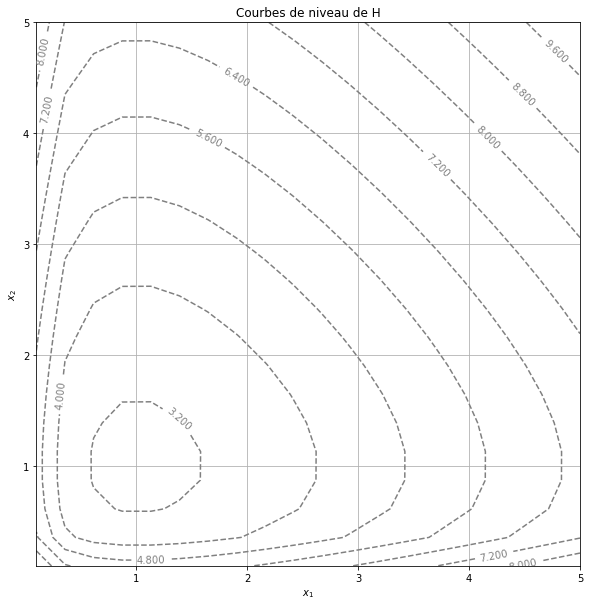

In [43]:
def H(x1, x2):
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

def display_contour(fct, levels):
    # Les bornes commencent à 0.1 pour éviter les divergences du log en 0.
    x = np.linspace(0.1, 5, 20)
    y = np.linspace(0.1, 5, 20)
    X, Y = np.meshgrid(x, y)
    Z = fct(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    plt.title("Courbes de niveau de H")
    plt.show()

    
display_contour(H, 10)

## Question 6

In [44]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.arange(t0, tf+dt, dt)
    x = np.zeros(shape=(2,1), dtype=float)
    x = np.column_stack([x, x0])
    for i in t[:-1]:
        new_x = np.array([x[0][-1], x[1][-1]]) + dt*f(x[0][-1], x[1][-1])
        x = np.column_stack([x,new_x])
    return t, np.array([x[0][1:],x[1][1:]]) 


def test_perfect(x0, dt, t0, tf):
    t = np.arange(t0, tf, dt)
    x = np.zeros(shape = (2,1), dtype = float)
    x = np.column_stack([x, x0])
    for i in t:
        new_x = np.array([np.cos(i), np.sin(i)])
        x = np.column_stack([x,new_x])
    return t, np.array([x[0][1:],x[1][1:]])


def f_test(x1, x2):
    return np.array([-x2, x1])

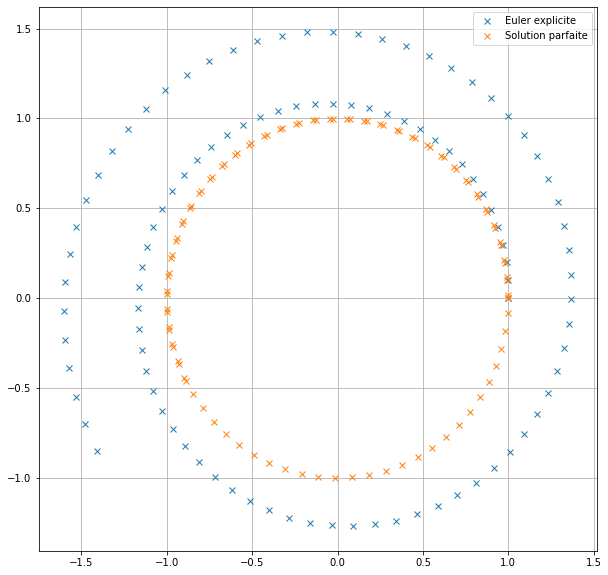

In [45]:
# Test d'Euler explicite sur une solution connue.
time, result = solve_euler_explicit(f_test, np.array([1.0, 0.0]), 0.1, 0.0, 10.0)
time_perfect, result_perfect = test_perfect(np.array([1.0, 0.0]), 0.1, 0.0, 10.0)
plt.plot(result[0], result[1], 'x', label='Euler explicite')
plt.plot(result_perfect[0], result_perfect[1], 'x', label='Solution parfaite')
plt.legend()
plt.grid()
plt.show()

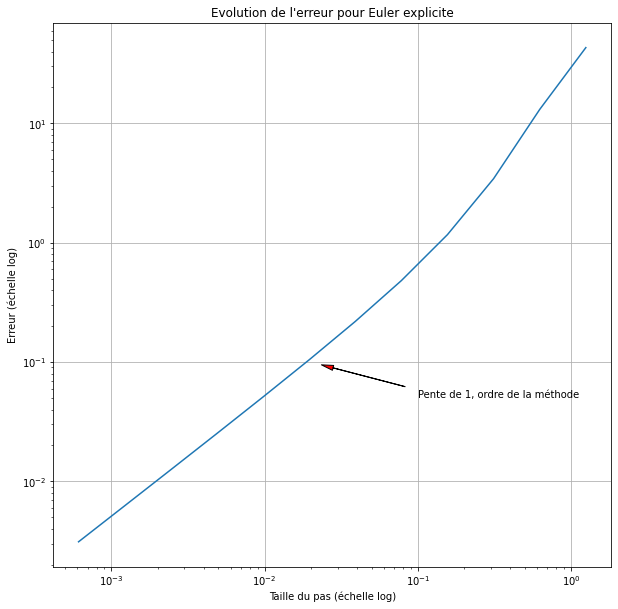

In [47]:
# Evolution de l'erreur et ordre du schéma Euler explicite.
err_array = np.zeros(shape = (2,1), dtype=float)
t_max = 10.0
for i in range(3, 15):
    # On teste la convergence sur un nombre de pas qui varie par puissances de 2 (choix arbitraire) 
    # sur l'equation différentielle du cercle.
    n_steps =int(2**i)
    delta_t = t_max/n_steps
    # Résultat de Euler explicite.
    result = solve_euler_explicit(f_test, np.array([1.0, 0.0]), delta_t, 0.0, t_max)[1]
    # Solution parfaite.
    result_perfect = test_perfect(np.array([1.0, 0.0]), delta_t, 0.0, t_max)[1]
    # Calcul de l'erreur avec le dernier point obtenu
    err = np.abs(np.linalg.norm(np.array([result[0][-1], result[1][-1]])-np.array([result_perfect[0][-1], result_perfect[1][-1]])))
    # On met les erreurs calculées pour chaque pas de temps dans un array pour plotter ensuite.
    err_array = np.column_stack([err_array, np.array([delta_t, err])])
plt.plot(err_array[0][1:], err_array[1][1:], label='Explicite')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Taille du pas (échelle log)')
plt.ylabel('Erreur (échelle log)')
plt.title("Evolution de l'erreur pour Euler explicite")
plt.annotate('Pente de 1, ordre de la méthode', xy=(0.02, 0.1), xytext=(0.1, 0.05), 
             arrowprops = {'facecolor': 'red', 'shrink': 0.1, 'width': 0.1, 'headwidth': 5.0})
plt.grid()
plt.show()

## Question 7

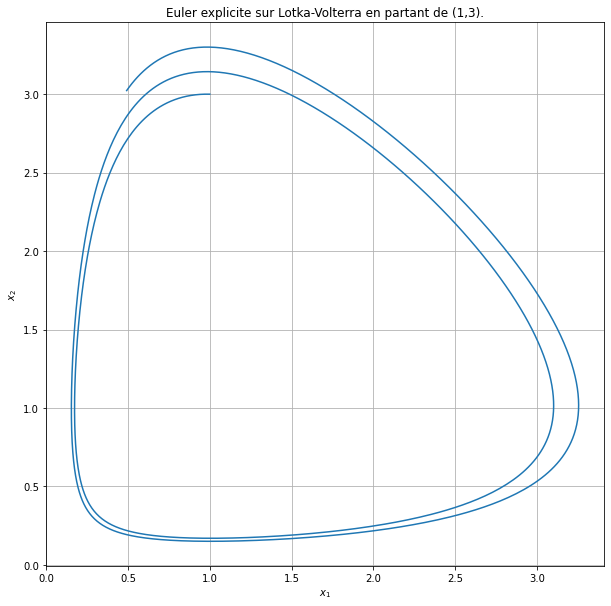

In [9]:
# Euler explicite sur Lotka-Volterra.
time, result = solve_euler_explicit(f, np.array([1.0, 3.0]), 0.01, 0.0, 10.0)
plt.plot(result[0], result[1], '-', label='Explicite')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Euler explicite sur Lotka-Volterra en partant de (1,3).')
plt.grid()
plt.show()

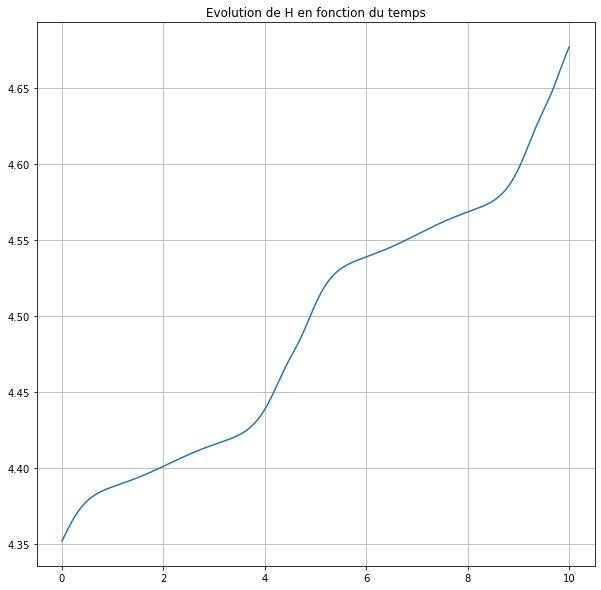

In [10]:
# Evolution de H en fonction du temps.
H_result = H(result[0],result[1])
plt.plot(time, H_result)
plt.title('Evolution de H en fonction du temps')
plt.grid()
plt.show()

On constate qu'en temps long, la trajectoire calculée via Euler explicite diverge lentement. Ce n'est pas le comportement qu'elle devrait avoir puisqu'elle est censée suivre la ligne de niveau de $H$ car $\langle\nabla H(x),f(x)\rangle=0~~\forall t\in\mathbb{R}$. Ce comportement est également remarquable sur le graphe de l'évolution de $H$, puisqu'elle est censée rester constante le long de n'importe quelle trajectoire.

## Question 8

In [11]:
def solve_euler_implicit(f, x0, dt, t0, tf):
    t = np.arange(t0, tf+dt, dt)
    x = np.zeros(shape=(2, 1), dtype=float)
    x = np.column_stack([x, x0])
    for i in t[:-1]:
        new_x = np.array([x[0][-1], x[1][-1]]) + dt*f(x[0][-1], x[1][-1])
        ant_x = new_x
        next_x = new_x +dt*f(ant_x[0], ant_x[1])
        # Le seuil choisi ici est arbitraire égal à 0,01.
        while np.linalg.norm(next_x-ant_x)/np.linalg.norm(new_x) >= 0.01:
            ant_x = next_x
            next_x = new_x +dt*f(ant_x[0], ant_x[1])
        x = np.column_stack([x, next_x])
    return t, np.array([x[0][1:], x[1][1:]])

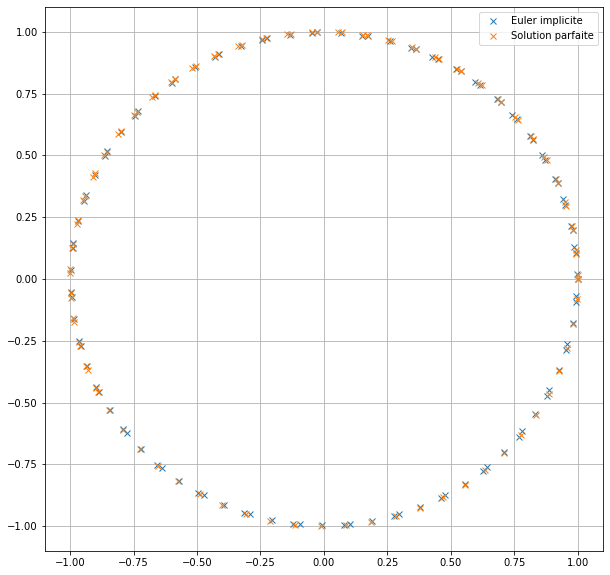

In [48]:
# Test d'Euler implicite sur une solution connue.
time, result = solve_euler_implicit(f_test, np.array([1.0, 0.0]), 0.1, 0.0, 10.0)
time_perfect, result_perfect = test_perfect(np.array([1.0, 0.0]), 0.1, 0.0, 10.0)
plt.plot(result[0], result[1], 'x', label='Euler implicite')
plt.plot(result_perfect[0], result_perfect[1], 'x', label='Solution parfaite')
plt.legend()
plt.grid()
plt.show()

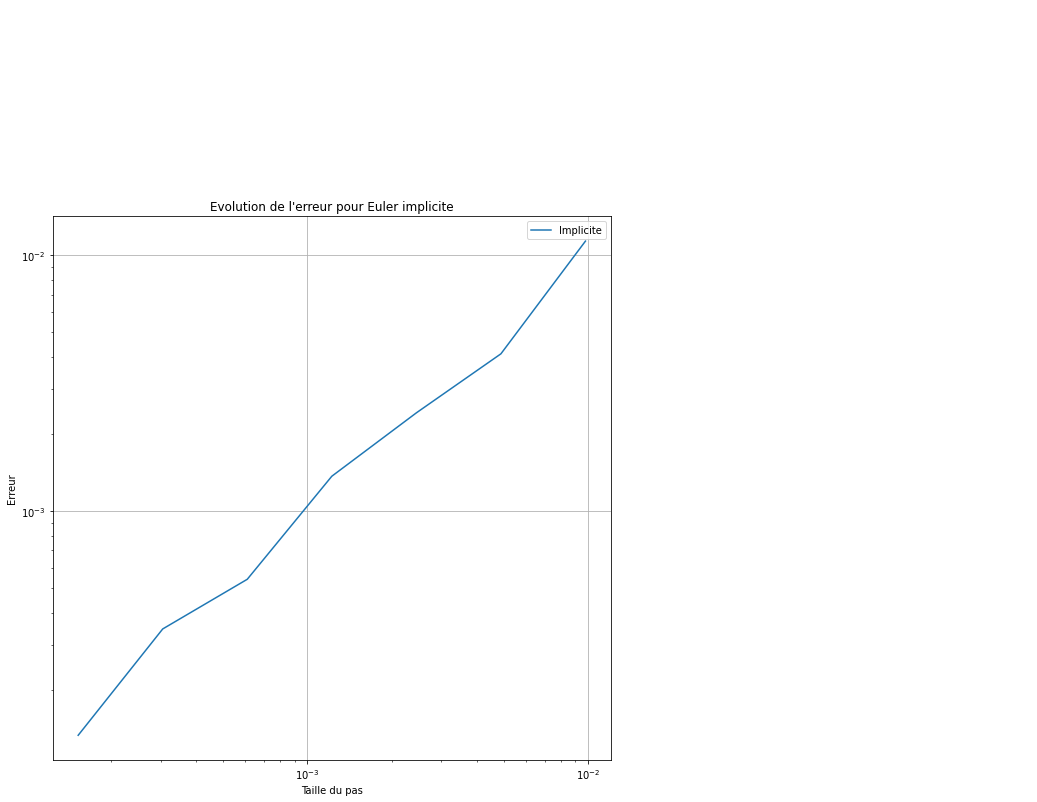

In [49]:
# Evolution de l'erreur et ordre du schéma Euler implicite.
err_array = np.zeros(shape = (2,1), dtype=float)
err = 1000
t_max = 10.0
for i in range(10, 17):
    n_steps =int(2**i)
    delta_t = t_max/n_steps
    result = solve_euler_implicit(f_test, np.array([1.0, 0.0]), delta_t, 0.0, t_max)[1]
    for ix, iy in zip(result[0], result[1]):
        norme = np.linalg.norm(np.array([ix, iy])-np.array([0.0, 1.0]))
        if norme < err:
            err = norme
    err_array = np.column_stack([err_array, np.array([delta_t, err])])

plt.plot(err_array[0][1:], err_array[1][1:], label='Implicite')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Taille du pas (échelle log)')
plt.ylabel('Erreur (échelle log)')
plt.title("Evolution de l'erreur pour Euler implicite")
plt.annotate('Pente de 1, ordre de la méthode', xy=(0.02, 0.1), xytext=(0.1, 0.05), arrowprops = {'facecolor': 'red', 'shrink': 0.1, 'width': 0.1, 'headwidth': 5.0})
plt.grid()
plt.legend()
plt.show()


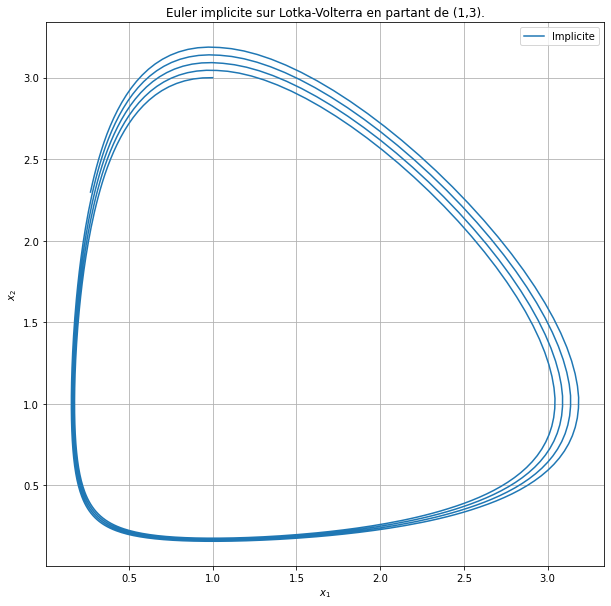

In [50]:
# Euler implicite sur Lotka-Volterra.
time, result = solve_euler_implicit(f, np.array([1.0, 3.0]), 0.01, 0.0, 10.0)
plt.plot(result[0], result[1], '-', label='Implicite')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Euler implicite sur Lotka-Volterra en partant de (1,3).')
plt.legend()
plt.grid()
plt.show()

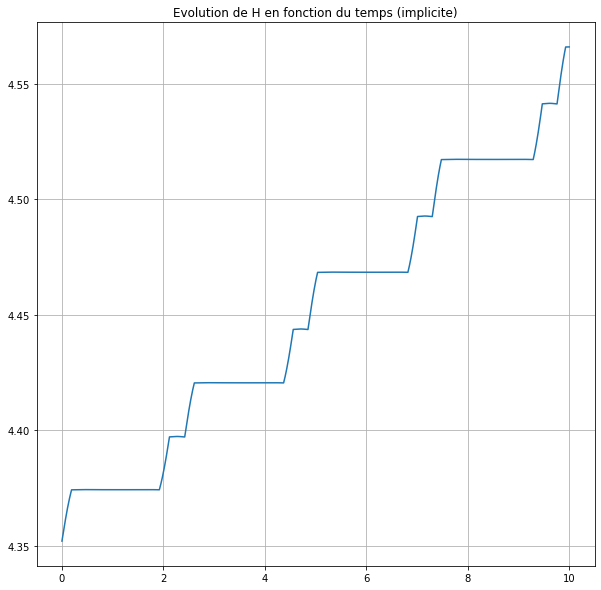

In [51]:
# Evolution de H pour Euler implicite en fonction du temps.
H_result = H(result[0],result[1])
plt.plot(time, H_result)
plt.title('Evolution de H en fonction du temps (implicite)')
plt.grid()
plt.show()

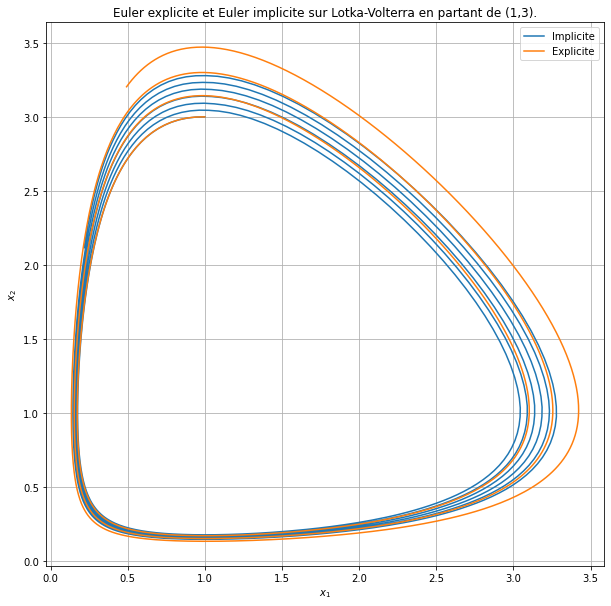

In [16]:
# Comparaison Euler.
time, result = solve_euler_implicit(f, np.array([1.0, 3.0]), 0.01, 0.0, 15.0)
plt.plot(result[0], result[1], '-', label='Implicite')
time, result = solve_euler_explicit(f, np.array([1.0, 3.0]), 0.01, 0.0, 15.0)
plt.plot(result[0], result[1], '-', label='Explicite')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Euler explicite et Euler implicite sur Lotka-Volterra en partant de (1,3).')
plt.legend()
plt.grid()
plt.show()

On voit très clairement que la méthode implicite est bien plus stable que la méthode explicite. La variation de $H$ est plus faible et par escalier.

## Question 9

Si $(x_1, x_2)$ est solution de $ \left \{ \begin{matrix}
\dot{x_1} = x_1 \left ( \alpha - \beta x_2 \right ) \\
\dot{x_2} = - x_2 \left ( \gamma - \delta x_1 \right )
\end{matrix}
\right .$, on sait que la fonction $H$ est constante donc $H - H_0$ est toujours nul. Ainsi, on a bien $(x_1, x_2)$ solution de 
$ \left \{ \begin{matrix}
\dot{x_1} = x_1 \left ( \alpha - \beta x_2 \right ) - u_1(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right ) \\
\dot{x_2} = - x_2 \left ( \gamma - \delta x_1 \right ) - u_2(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right )
\end{matrix}
\right .$





Les deux systèmes 
$ \left \{ \begin{matrix}
\dot{x_1} = x_1 \left ( \alpha - \beta x_2 \right ) - u_1(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right ) \\
\dot{x_2} = - x_2 \left ( \gamma - \delta x_1 \right ) - u_2(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right )
\end{matrix}
\right .$ 
et 
$ \left \{ \begin{matrix}
\dot{x_1} = x_1 \left ( \alpha - \beta x_2 \right ) \\
\dot{x_2} = - x_2 \left ( \gamma - \delta x_1 \right )
\end{matrix}
\right .$ 
sont uniquement composés de fonctions continûment différentiables donc la solution de chaque système est unique pour une condition initiale donnée et égale à la solution maximale. 


Si on part de la condition initale $t = 0$, notons $X_0$ la solution du système $ \left \{ \begin{matrix}
\dot{x_1} = x_1 \left ( \alpha - \beta x_2 \right ) - u_1(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right ) \\
\dot{x_2} = - x_2 \left ( \gamma - \delta x_1 \right ) - u_2(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right )
\end{matrix}
\right .$. On sait que en $t = 0$, cette solution est égale à la solution du système de Lotka-Voltera en $t = 0$, notée $X_1$. 


Comme les solutions $X_0$ et $X_1$ sont uniques et que l'on sait que $X_1$ est aussi solution du système, on a bien $X_0 = X_1$ 
$ \left \{ \begin{matrix}
\dot{x_1} = x_1 \left ( \alpha - \beta x_2 \right ) - u_1(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right ) \\
\dot{x_2} = - x_2 \left ( \gamma - \delta x_1 \right ) - u_2(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right )
\end{matrix}
\right .$, on a bien $X_0 = X_1$ ce qui prouve l'équivalence des solutions.

## Question 10

On a déjà calculé la dérivée de $H$ par rapport à $(x_1, x_2)$ : 
$\nabla H(x_1,x_2)= \begin{pmatrix} 
\delta-\frac{\gamma}{x_1} \\
\beta - \frac{\alpha}{x_2}
\end{pmatrix}$

On a donc 
$\left \| \nabla H(x_1, x_2) \right \| ^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2$

Calculons la dérivée de $H-H_0$ par rapport au temps:

$\frac{d}{dt}(H - H_0) = \left ( \delta - \frac{\gamma}{x_1} \right ) \dot{x_1} + \left ( \beta - \frac{\alpha}{x_2} \right ) \dot{x_2}$

$ = \left ( \delta - \frac{\gamma}{x_1} \right ) \left ( \alpha - \beta x_2 \right ) x_1 - \left ( \beta - \frac{\alpha}{x_2} \right ) \left ( \gamma - \delta x_1 \right )x_2 - \left [ \left ( \delta - \frac{\gamma}{x_1} \right ) u_1 + \left ( \beta - \frac{\alpha}{x_2} \right ) u_2 \right ] \left ( H - H_0 \right ) $

Si l'on choisit $u$ colinéaire à $\nabla H$, avec un facteur de colinéarité $k$, on obtient bien 
$\frac{d}{dt}(H(x(t)) - H_0) = -k \left \| \nabla H(x_1, x_2) \right \| ^2 \left ( H(x(t)) - H_0 \right )$.

$x$ reste à une distance strictement positive de $\overline{x}$ donc on sait que $\left \| \nabla H \right \| ^2 > 0$. On peut donc trouver $c$ et $C$ strictement positifs tel que $\forall t$ $ C \geq \left \| \nabla H(x(t)) \right \| ^2 \geq c$. On a alors :
$-k C \left ( H(x(t)) - H_0 \right ) \leq \frac{d}{dt}(H(x(t)) - H_0) \leq -k c \left ( H(x(t)) - H_0 \right )$. 
Par positivité de l'intégrale, on peut montrer que $e^{-k C t} \leq H(x(t)) - H_0 \leq e^{-k c t}$. $H(x(t))$ converge donc bien exponentiellement vers $H_0$.

## Question 11

Pour assurer la stabilité de $H$ lors de l'implémentation du schéma d'Euler, il suffit d'utiliser le système : 
$ \left \{ \begin{matrix}
\dot{x_1} = x_1 \left ( \alpha - \beta x_2 \right ) - u_1(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right ) \\
\dot{x_2} = - x_2 \left ( \gamma - \delta x_1 \right ) - u_2(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right )
\end{matrix}
\right .$ 

avec $u = k~\nabla{H}$.

Le rôle de k est de faire converger $H$ vers $H_0$ le plus rapidement possible, cependant, on ne peut pas le choisir arbitrairement grand. 
En effet dans le schéma d'Euler, on aura au premier ordre en utilisant $\frac{d}{dt}(H(x) - H_0) = -k \left \| \nabla H(x) \right \| ^2 \left ( H(x) - H_0 \right )$ : 

$H(x^{j+1}) - H_0 = \left( 1 - k \left \| \nabla H(x^j) \right \| ^2 dt \right) \left( H(x^j) - H_0 \right)$.

Or on a vu que $H$ converge vers $H_0$ exponentiellement, donc la différence $H - H_0$ a un signe constant. Si on choisit un pas de temps $dt$ trop petit ou un $k$ trop grand, tel que $1 - k \left \| \nabla H(x_1, x_2) \right \| ^2 dt < 0$, le signe de la différence changera à chaque itération.